# Understanding the Demographics & Influence of Technica Registrants

### By Raghav Chetal and Sofia Fernandez-Poyatos

![](technica_cover.jpg)

## Our Motivation

[Technica](https://gotechnica.org) is the world's largest all-women and non-binary hackathon, hosted annually at the University of Maryland. Since it was founded in 2015, Technica has been putting a spotlight on women in the computer science workplace and empowering them to succeed. Computer Science has always been a generally male-dominated field. 18% of all computer scientists in the industry and in education are women and 20% of computer science students are women at University of Maryland. Technica aims to make it easier for underrepresented minorities to get started in tech and feel welcome doing so. </p>

Both of us have been actively involved in Technica's organization through director and mentor positions. We are interested in understanding Technica's reach to different age groups and geographical areas. Through our analysis we will be able to understand whether the pool of hackers is diverse in age, ethnicity and location, and suggest ways how to improve. </p>

To learn more about Technica’s efforts, please visit: https://medium.com/gotechnica 


## Required Libraries
Here are the libraries we used for our tutorial and how we used them:
<br>
* _pandas_ : a data analysis toolkit which makes storing and accessing data easier
* _numpy_ : a package for mathematical computing
* _seaborns_ : creating graphs (pie charts, bar charts, etc.)
* _re_ : using regex to select preferred word
* _beautifulsoup4_ : to scrape web for coordinates of states to plot on map
* _requests_ : to access url page to scrape for bs4
* _folium_ : creating map visualizations of hackers
* _sklearn_ : making regressions and doing statistical analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import re
from bs4 import BeautifulSoup
import requests

%matplotlib inline
matplotlib.style.use("ggplot")

data2017 = pd.read_csv("technica_data_2017.csv")
data2018 = pd.read_csv("technica_data_2018.csv")
data2019 = pd.read_csv("technica_data_2019.csv")

## Data Curation
<br>
We received permission from the Technica organizing team to use all of the participant registration datasets spanning 2016 - 2019. Although we only have four years of data available since Technica's inception, we've decided to primarily use 2017-2019 and bypass 2016, because the 2016 dataset does not provide substantial data. </p>

Before uploading the CSV files we removed any private data (i.e. participants name, email, phone numbers, food restrictions and t-shirt sizes) and any other data that can be linked to a specific user. We will remove any unecessary data (pronouns, tokens, and unnamed columns) that do not contribute to our analysis and rename all columns to have the same titles, in order to analyze data easily.</p>

Since documentation and data gathering has got better throughout the years, each dataset is slightly different. Later years contain more useful data. <br>
For instance:
* <b> Technica 2015 </b> has no available registration dataset . <br><br>
* <b> Technica 2016 </b> is missing significant relevant information, like gender, ethnicity, school, hackers' states and previous hackathon experiences.<br><br>
* <b> Technica 2017 </b>  has Age, Gender Identitity, Backgrounds, First Hackathon?, Major and Institution. <br><br>
* <b> Technica 2018 </b> has Age, Birthday, Gender Identity, Backgrounds, School, Level, Graduation Year, First Hackathon?, First Technica?, Location, Institution, Major, State, Country (non-USA), Tech + Research Track? <br><br>
* <b> Technica 2019 </b> has all of the columns mentioned above with more specific questions about hackathons that have been excluded for comparison.

### Data Collection Challenges

We would also like to preface that all of this data is user-input, which means that there are quite of few incongruencies that we took care while curating the data (i.e. one of the hackers inputted they are 99 years old and another hacker inputted their gender as "Dad"). The data collected has been cleaned to the best of our abilities, however there are some slight errors that we were not able to account for. 

We also encountered issues with extreme amounts of missing data, as not all fields were required, and having only a certain percentage of the total applicants fill out information makes it significantly less accurate.

We encourage the Technica team in the future to  provide options rather than open text boxes to make data analysis more accurate </p>

### Dataset Modifications

Here we will display the data for each of our datasets from 2017-2019, so you have an idea of what we're working with.

We began by using the 2018 Technica data as our base year, as it asks the most pertinent questions and has the cleanest organization. The other two years of data will be modified to fit the format of the 2018 dataset.

In [2]:
clean_data = data2018.drop(['Preferred Pronouns', 'Food Restrictions','Unnamed: 14','University'], axis = 'columns')
clean_data.head()

,Age,Birthday,Gender Identity,Backgrounds,School Level,Graduation Year,First Hackathon?,First Technica?,Location,Institution,Major,State,Country (non-USA),Tech + Research Track?
0,22,5/18/96,Female,Hispanic or Latino,College (Undergraduate),2019,True,True,Olney,University of Maryland College Park,Environmental Science and Technology,Maryland,NaN,True
1,17,5/15/01,Female,Asian / Pacific Islander,High School,2019,True,True,Ellicott City,NaN,NaN,Maryland,NaN,False
2,21,10/25/97,Female,Prefer not to answer,College (Undergraduate),2020,False,True,Gaithersburg,University of Maryland College Park,Computer Science,Maryland,NaN,False
3,20,9/22/98,Female,Asian / Pacific Islander,College (Undergraduate),2021,True,True,College Park,University of Maryland College Park,Mechanical Engineering,Maryland,NaN,True
4,20,3/12/98,Female,Asian / Pacific Islander,College (Undergraduate),2020,False,True,College Park,University of Maryland College Park,Bioengineering,Maryland,NaN,True


The 2018 data is the most complete dataset that we have, so in order to run models on the different datasets, we have to modify the other datasets to match the headers and calculate missing information. The following code will fix the 2019 dataset and calculate the participant's age based on their birth date, since that information was not recorded at the time.

In [3]:
clean_2019_data = data2019.drop(['Preferred Pronouns', 'Other.1', 'Unnamed: 13','Please type in your university.', 'Unnamed: 25', 'Unnamed: 26'], axis = 'columns')
clean_2019_data

# Calculating age based on birthday
now = pd.Timestamp('now')
clean_2019_data['Birthday'] = pd.to_datetime(clean_2019_data['Birthday'], format='%m/%d/%y')
clean_2019_data['Birthday'] = clean_2019_data['Birthday'].where(clean_2019_data['Birthday'] < now, clean_2019_data['Birthday'] -  np.timedelta64(100, 'Y'))
clean_2019_data['Age'] = (now - clean_2019_data['Birthday']).astype('<m8[Y]')

# Combining all Backgrounds into one series
clean_2019_data['Backgrounds'] = clean_2019_data[clean_2019_data.columns[3:11]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
clean_2019_data = clean_2019_data.drop(columns=['American Indian or Alaska Native', 'Asian / Pacific Islander', 
                              'Black or African American', 'Hispanic or Latino', 'Middle Eastern or North African', 
                              'Native Hawaiian or Other Pacific Islander', 'White/Caucasian', 'Prefer not to answer'])

# Combine all Genders into one series
clean_2019_data['Gender Identity'] = clean_2019_data[clean_2019_data.columns[1:3]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
clean_2019_data = clean_2019_data.drop(columns=['Other'])

clean_2019_data.head()

,Birthday,Gender Identity,State,Country of Origin (Non-US),School Level,What is the name of your school?,What institution do you attend?,Major,Please type in your major.,What is your expected year of graduation?,First Technica?,First Hackathon?,Age,Backgrounds
0,1998-08-13,Female,Maryland,NaN,College (Undergraduate),NaN,University of Maryland College Park,Aerospace Engineering,NaN,2020.0,False,True,21.0,White/Caucasian
1,2003-05-14,Female,Maryland,NaN,High School,Montgomery Blair High School,NaN,NaN,NaN,NaN,True,NaN,16.0,White/Caucasian
2,1998-05-23,Female,Maryland,NaN,College (Undergraduate),NaN,University of Maryland College Park,Psychology,NaN,2020.0,True,NaN,21.0,White/Caucasian
3,2006-08-29,Female,Maryland,NaN,Middle School,Lime Kiln,NaN,NaN,NaN,NaN,True,NaN,13.0,
4,1998-04-10,Female,Maryland,NaN,College (Undergraduate),NaN,University of Maryland College Park,Electrical Engineering,NaN,2020.0,True,NaN,21.0,"Asian / Pacific Islander,White/Caucasian"


We added a potential section for the 2017 data to be scrubbed and modified, however we did not need to modify any of the data. We left this section in just in case we need to modify anything later.

In [4]:
clean_2017_data = data2017
clean_2017_data.head()

,Age,Gender Identity,Backgrounds,First Hackathon?,Major,Institution
0,18,Female,Asian,No,Computer Science,University Of Maryland
1,22,Female,Hispanic or Latino,No,NaN,NaN
2,18,Female,Asian,Yes,Biochemistry,University of Maryland College Park
3,14,Female,Black or African American,No,NaN,Western School of Technology and Environmental...
4,25,Female,Asian,No,Computer Science,UMBC


In [5]:
datasets = [clean_2017_data, clean_data, clean_2019_data]
full_datasets = [clean_data, clean_2019_data]
data_years = [2017, 2018, 2019]
full_data_years = [2018, 2019]

## Exploratory Analysis of Registrant Data
After having curated our datasets, we will now take a look at the different aspects of the registrants. 

In [6]:
# Where we are getting the number of registrants for data above
r, c = clean_2017_data.shape
print("Number of 2017 Registrants: " + str(r))
r, c = clean_data.shape
print("Number of 2018 Registrants: " + str(r))
r, c = clean_2019_data.shape
print("Number of 2019 Registrants: " + str(r))

# The number of participants is found in Technica's internal Google Drive.

Number of 2017 Registrants: 1892
Number of 2018 Registrants: 2224
Number of 2019 Registrants: 2241


#### Popularity of Technica

Major League Hacking’s (mlh.io) mission is to serve as mentors to student-led hackathons. Over the course of the years, they have suggested that in order to reach our expected amount of hackers or participants, that there needs to be a significant growth in registrations. They have said that only 40-50% of registrants actually end up attending the event.

Technica 2017
	* Number of participants: 827
	* Number of registrants: 1892
<b> 43% of applicants participated in 2017 </b> <br> <br>
Technica 2018
	* Number of participants: 872
	* Number of registrants: 2224
<b> 39% of applicants participated in 2018 </b> <br> <br>
Technica 2019
	* Number of participants: 928
	* Number of registrants: 2241
<b> 41% of applicants participated in 2019 </b> <br>

It's incredible how accurate Major League Hacking is with respect to estimating benchmarks.

#### Differences in Age Groups

We also took a look at the difference between registrants between 2017 and 2019. The pie charts below indicate that, not surprisingly, the majority of registrants are college students, since Technica is run by University of Maryland students. Nevertheless, one of its main marketing targets are minors; Technica made big efforts to involve young women in high school and middle school to find a passion in tech at an early age.

The number of minors has drastically increased from 2017 and 2018 to 2019, as well as the number of people who have graduated. This demonstrates promise for an increase in minors and postgraduates in Technica 2020's registrant group.

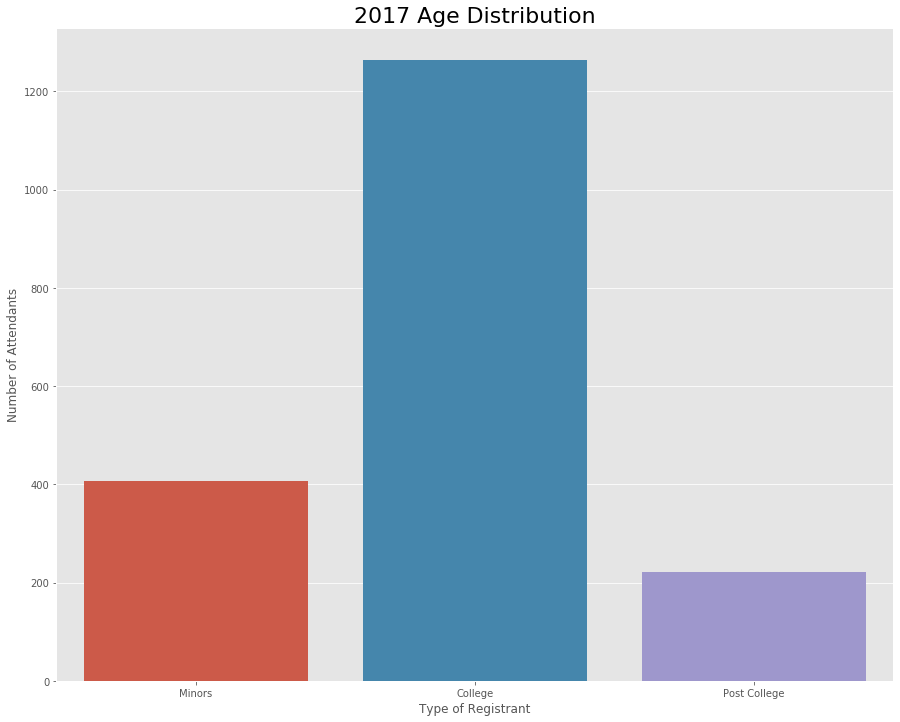

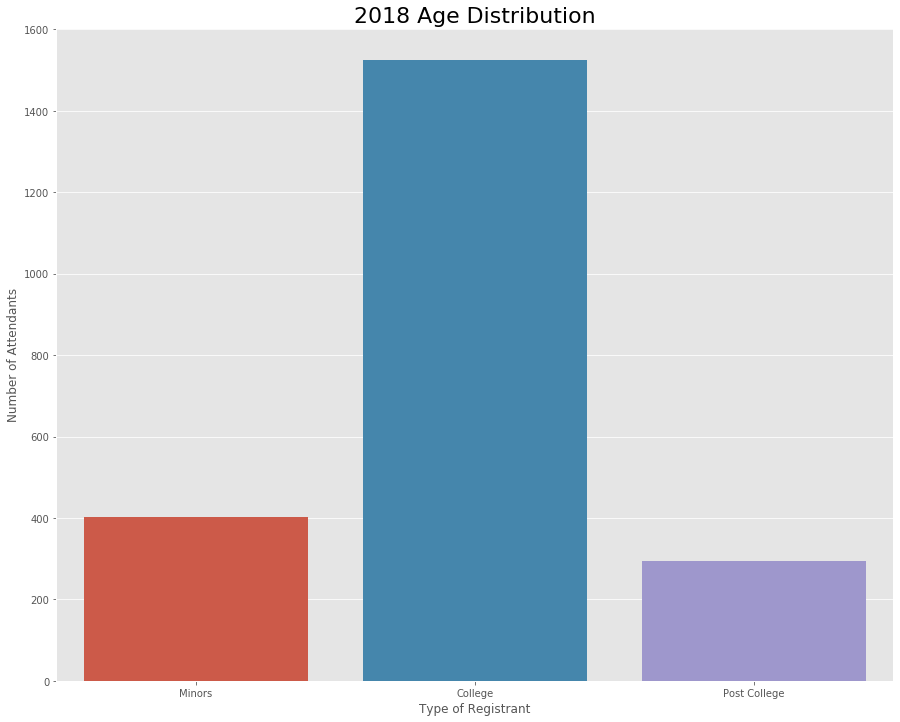

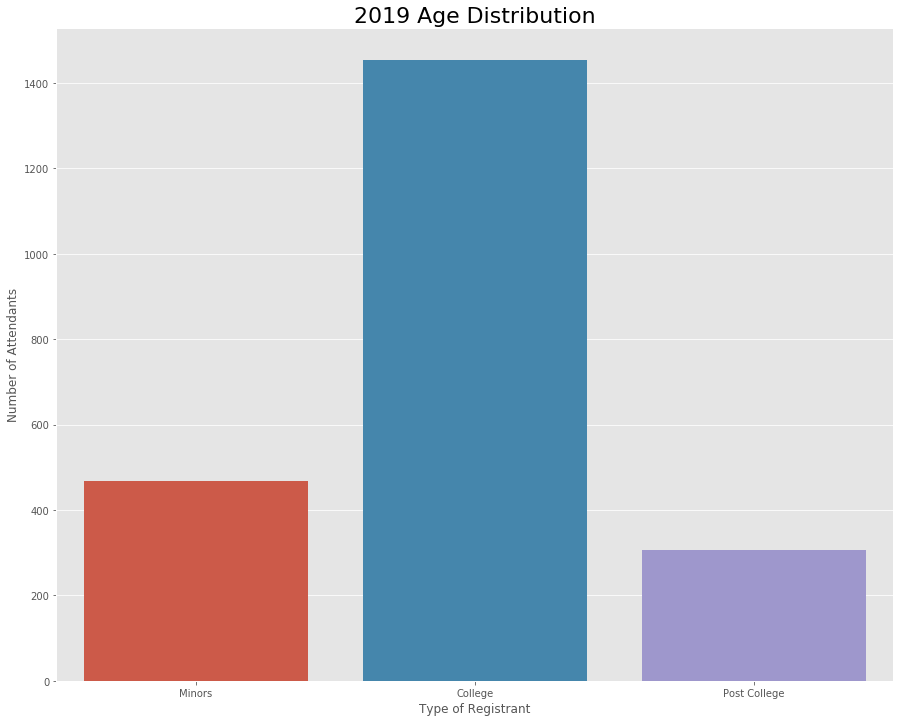

In [7]:
i = 0

for data in datasets:
    #majors
    minors = 0
    college = 0
    post_college = 0

    ages = data['Age'].dropna()
    for age in ages:
        if int(age) <18:
            minors += 1
        elif int(age) >= 18 and int(age) <= 23:
            college += 1
        else:
            post_college += 1


    x = ['Minors', 'College', 'Post College']
    y = [minors, college, post_college]

    plt.figure(figsize=(15,12))
    my_plot = sns.barplot(x, y);
    my_plot.set(xlabel ='Type of Registrant', ylabel = 'Number of Attendants') 
    plt.title(str(data_years[i]) + ' Age Distribution', fontsize = 22)
    i += 1
    

#### Taking a Look at Registrants’ Majors
We also wanted to understand what kinds of fields people who are interested in attending Technica are currently pursuing, and whether the types of applicants have changed in the past 3 years. We created bar graphs from 2017-2019 looking at the top 15 most common majors. These bar graphs demonstrate that the overwhelming majority of registrants are Computer Science across all years. Moreover, the top 4 majors across all years have been Computer Science, Information Systems, Computer Engineering and Biological Sciences. While both 2017 and 2018 are dominated almost exclusively by these two sections, in 2019 we see a massive shift in the major, with the “Other” section drawing over 200 people, who are either humanities majors or people with multiple majors. This shift indicates that Technica is expanding beyond it’s initial tech-based demographic, and is becoming an important part of other majors as well.

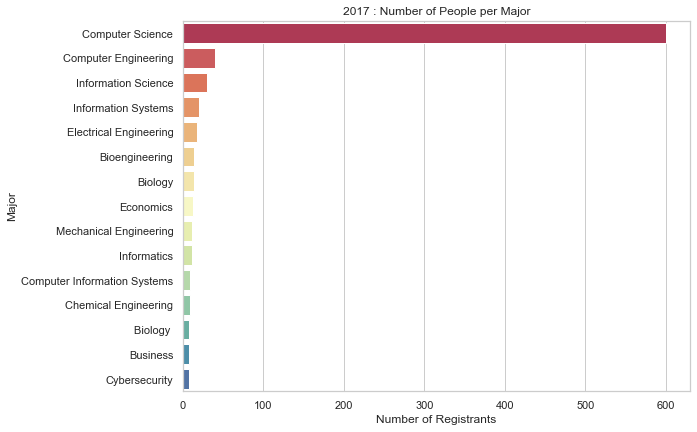

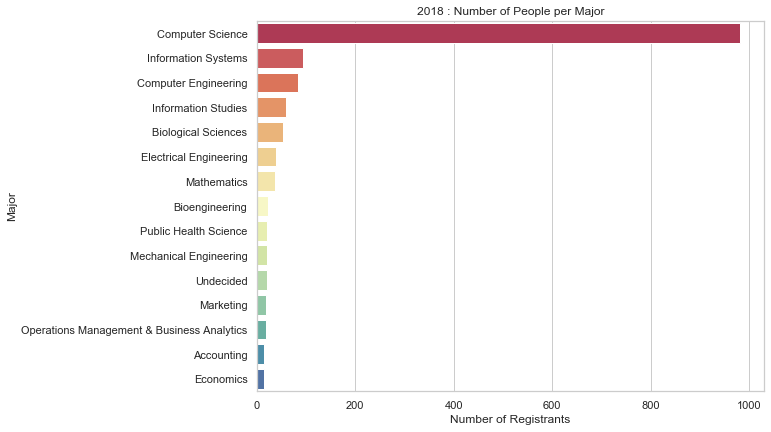

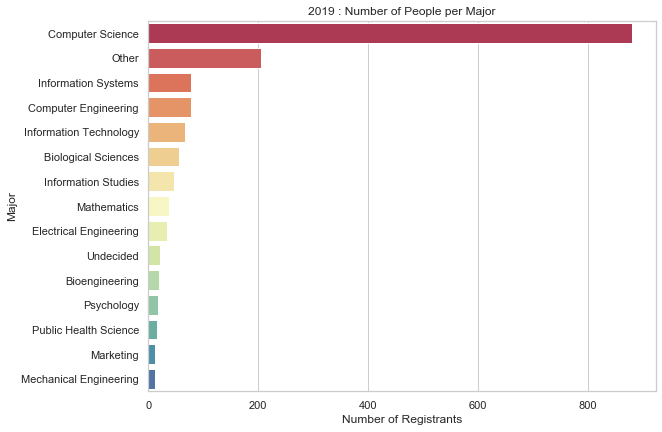

In [8]:
i = 0

for data in datasets:
    df_major = pd.DataFrame(data['Major'].value_counts())
    df_major = df_major.head(15)
    major_clean = df_major.reset_index()
    major_clean.columns = ['Major', 'Number of Registrants'] 

    sns.set(style="whitegrid")
    plt.figure(figsize=(20,15))
    the_grid = GridSpec(2, 2)

    plt.subplot(the_grid[0, 1],  title=str(data_years[i]) + ' : Number of People per Major')
    sns.barplot(x='Number of Registrants',y='Major', data=major_clean, palette='Spectral')
    i += 1

#### Taking a look at the Gender Identity Distribution

Unnsurprisingly, every year, over 95% of the registrants are women, with a small minority spread out over Non-Binary individuals, Males, and Genderfluid people. 

While the overwhelming majority of the people are women in the registrants, the number of men and non-binary individuals who have been applying to Technica has been steadily increasing, indicating that the spread of the hackathon is reaching more and more individuals. Although this hackathon is meant primarily for women and non-binary individuals, this shift to being seen as more inclusive towards everyone is important.

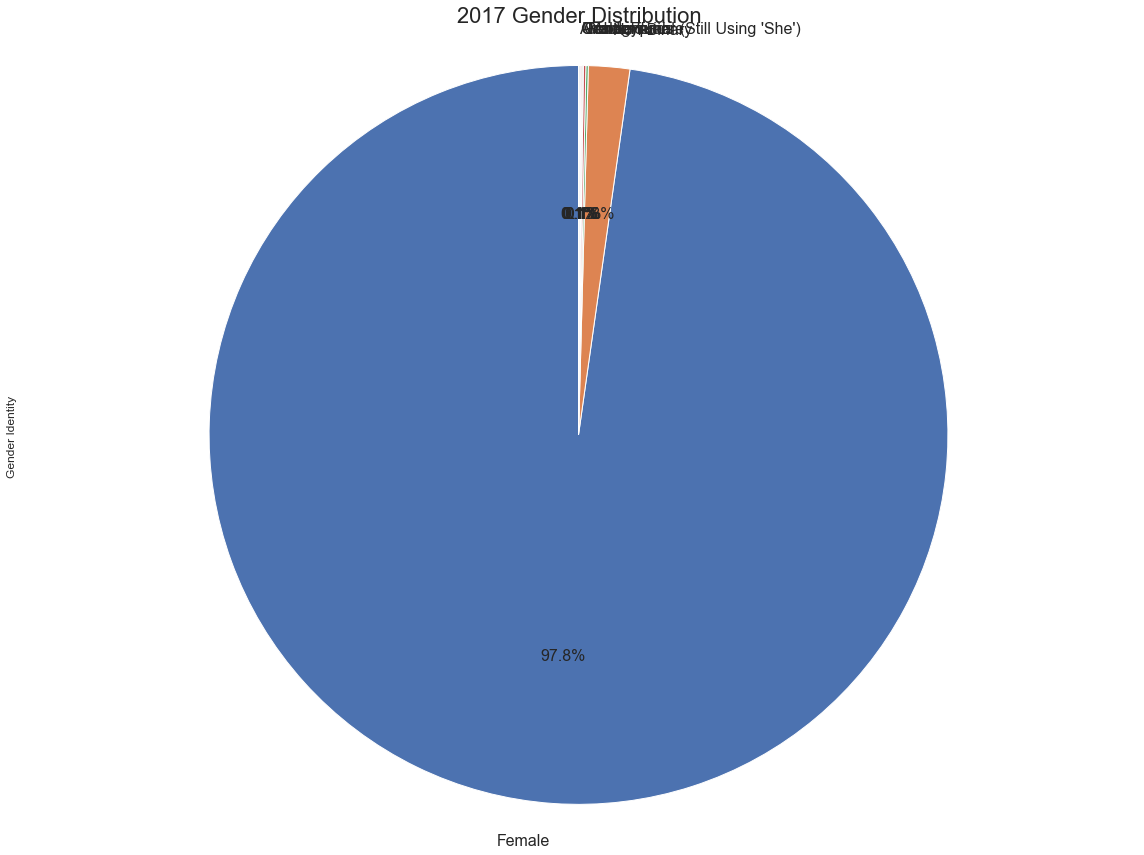

Female                             1843
Non-Binary                           34
Male                                  2
Trans Female                          2
Genderfluid                           1
Unsure                                1
Genderqueer (Still Using 'She')       1
Androgynous                           1
Name: Gender Identity, dtype: int64


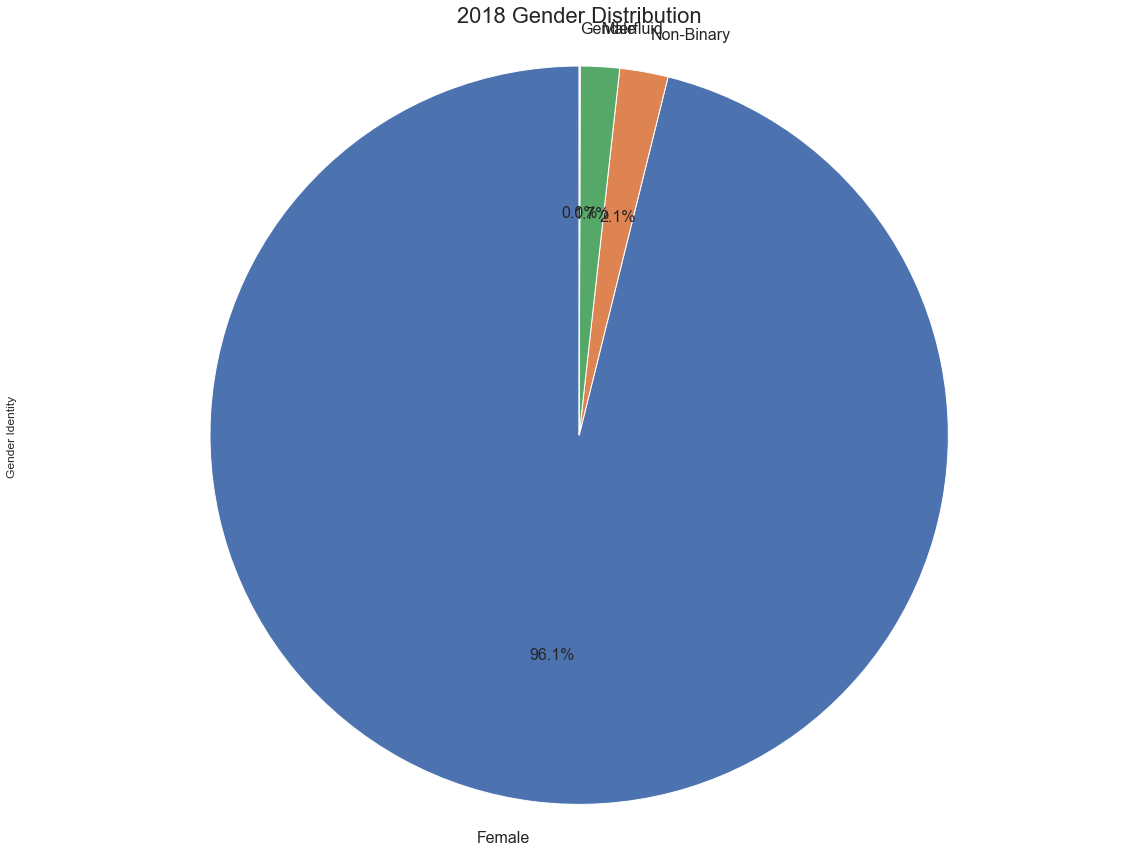

Female         2135
Non-Binary       47
Male             38
Genderfluid       1
Name: Gender Identity, dtype: int64


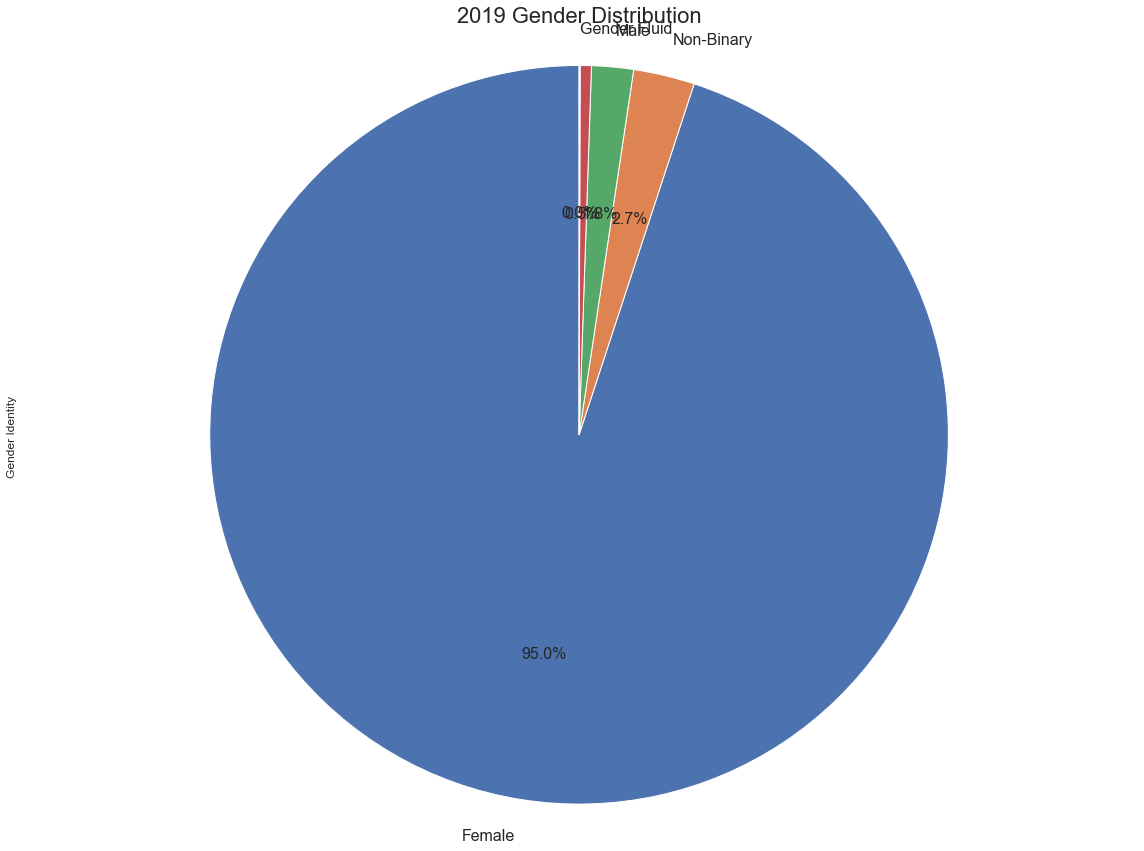

Female          2128
Non-Binary        60
Male              41
                  11
Gender Fluid       1
Name: Gender Identity, dtype: int64


In [9]:
i = 0

for data in datasets:
    # Removes invalid answers, surveys were self-fill, so there is some invalid data
    occurrences = data['Gender Identity'].str.title().value_counts()

    # Creates a Pie Chart of the Gender Identity data
    plt.figure(2, figsize=(20,15))
    occurrences.plot.pie(y = occurrences.index,
               shadow=False, 
               startangle=90,
               autopct='%1.1f%%',
            textprops={'fontsize': 16})

    plt.axis('equal')
    plt.title(str(data_years[i]) + ' Gender Distribution', fontsize = 22)
    plt.show()
    i += 1
    
    print(occurrences)

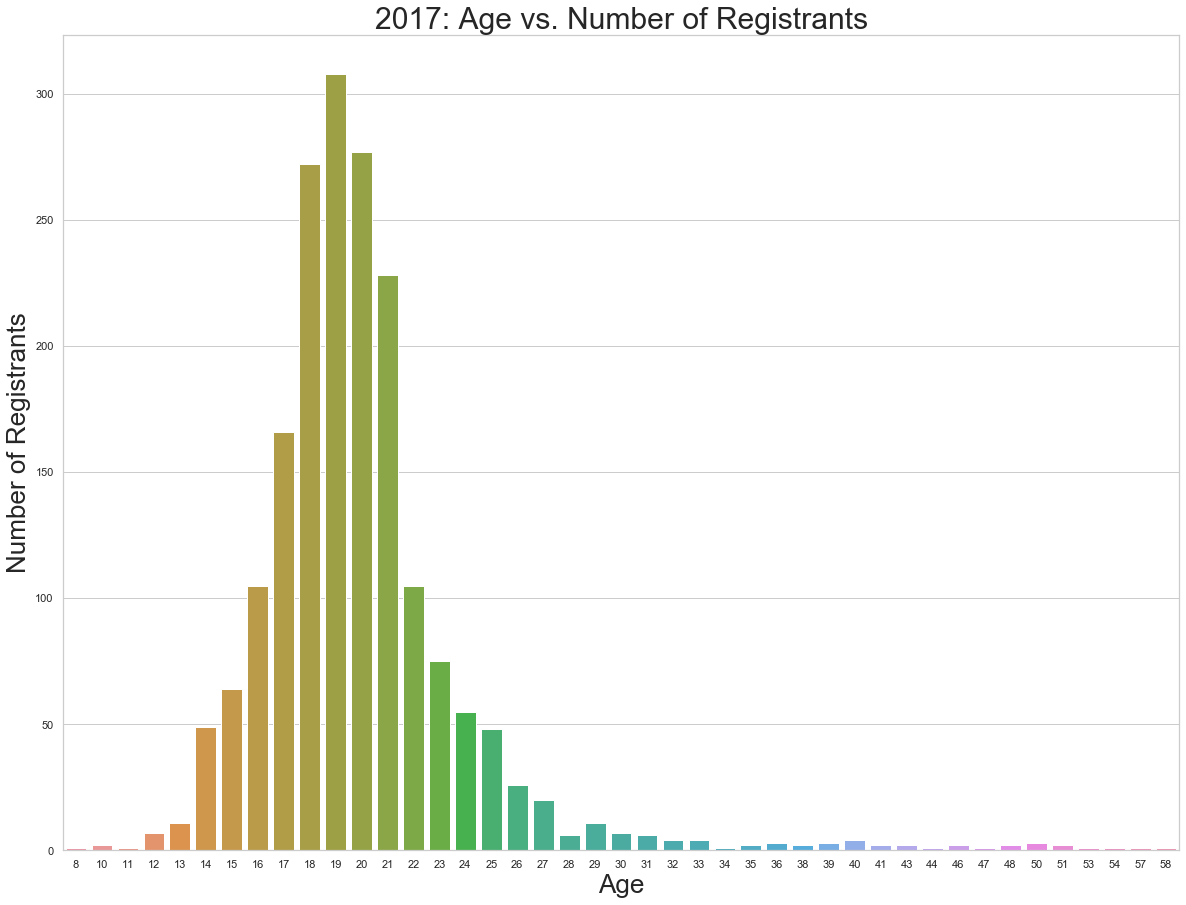

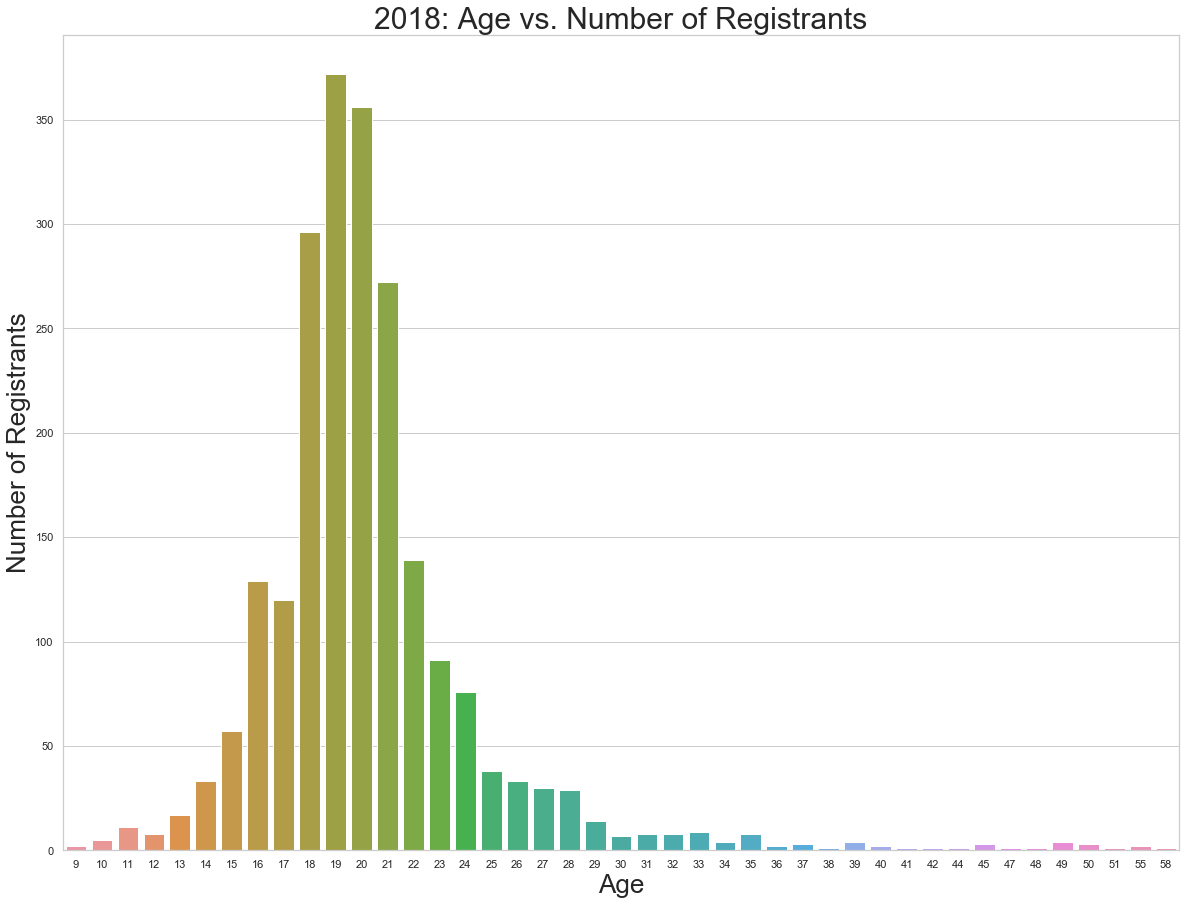

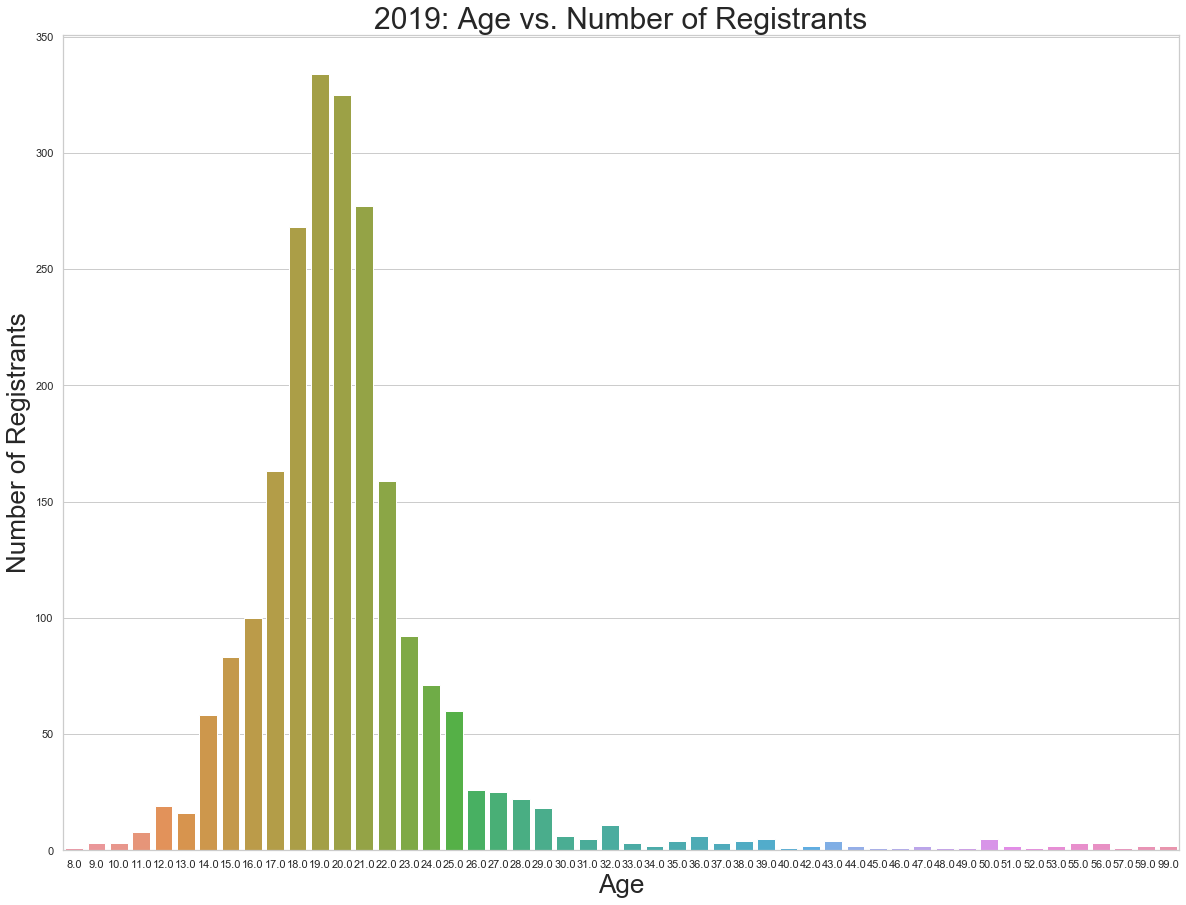

In [22]:
i = 0

for data in datasets:
    # Removes invalid answers, surveys were self-fill (Remove ages under 5)
    age_fix = data[data['Age'] > 5]
    occurrences = age_fix['Age'].value_counts()

    # Plot the Barplot
    plt.figure(figsize=(20,15))
    ax = sns.barplot(x=occurrences.keys(), y=occurrences.values, data=clean_data)
    plt.title(str(data_years[i]) + ': Age vs. Number of Registrants', fontsize = 30)
    plt.ylabel('Number of Registrants', fontsize = 26)
    plt.xlabel('Age', fontsize = 26)
    plt.show()
    
    i += 1

#### Number of Registrants per Race
After analyzing the data, it was clear that not only is there a gap in gender within computer science, but also a disparity of minorities within the Technica registrants.  We created a bar graph to understand the diversity in terms of the races of our registrants from 2017-2019. We decided to focus our dataset on the most represented races at Technica: Asian, Hispanic, White, Black, Middle Eastern and a mix of Asian & White. <br>

These bar graphs demonstrated that over the past three years more than 60% of registrants have been primarily Asian. Not only that, but the top 4 ethnicities, in decreasing order, have been Asian, White, Black, and Hispanics. The percentages of White, Black, and Hispanics do not come close to that of the Asian registrants.  <br>

In order to diversify the pool of registrants, Technica could focus on reaching out and marketing towards currently underrepresented communities.

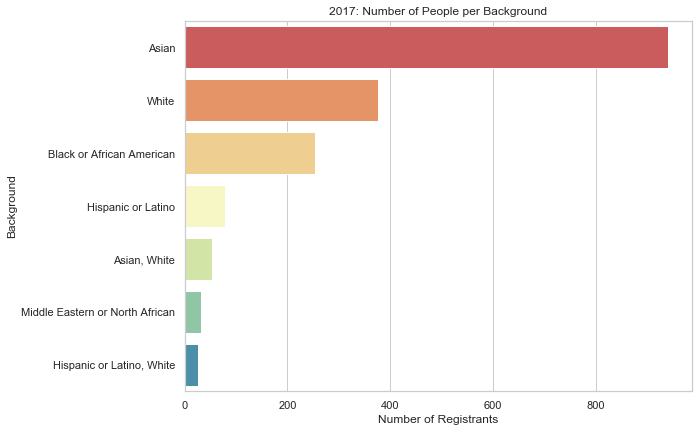

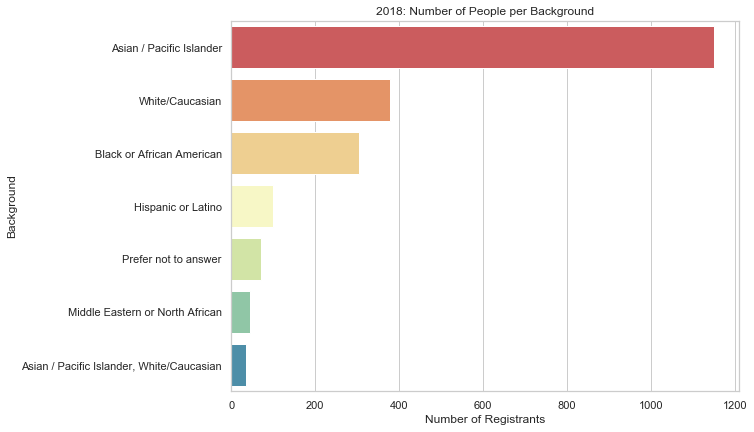

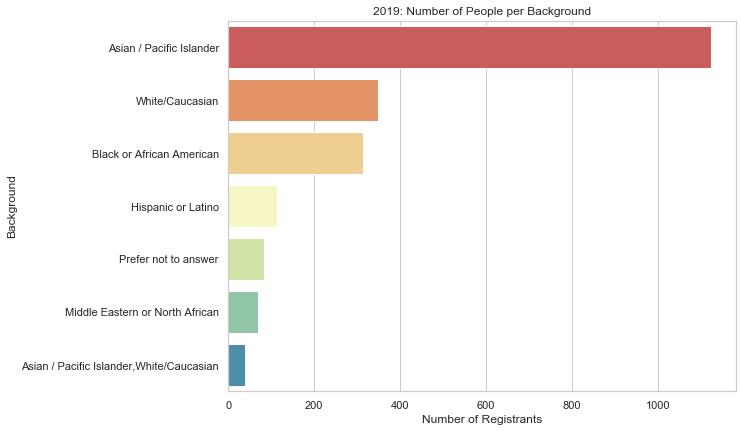

In [23]:
i = 0

for data in datasets:    
    df_background = pd.DataFrame(data['Backgrounds'].value_counts())
    df_background = df_background.head(7)
    background_clean = df_background.reset_index()
    background_clean.columns = ['Background', 'Number of Registrants'] 

    sns.set(style="whitegrid")
    plt.figure(figsize=(20,15))
    the_grid = GridSpec(2, 2)

    plt.subplot(the_grid[0, 1],  title=str(data_years[i]) + ': Number of People per Background')
    sns.barplot(x='Number of Registrants',y='Background', data=background_clean, palette='Spectral')
    plt.show()
    
    i += 1

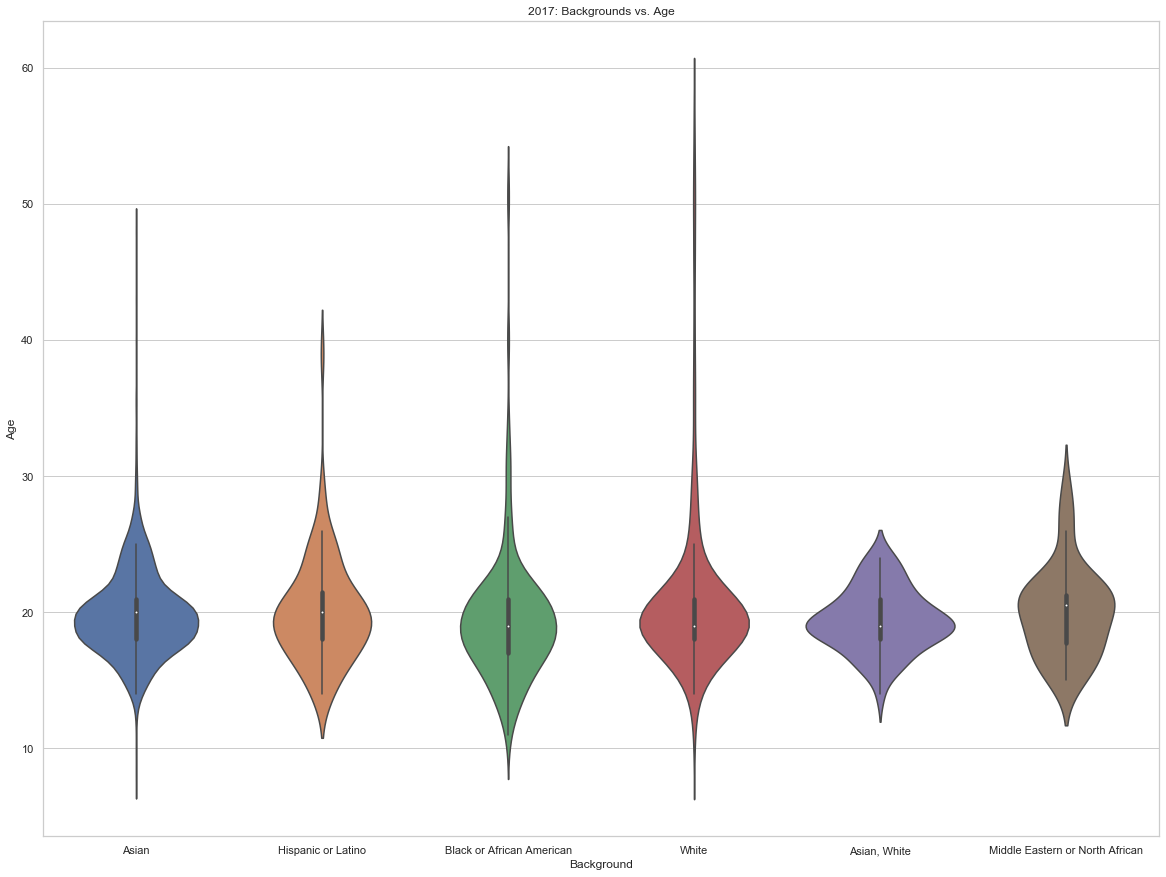

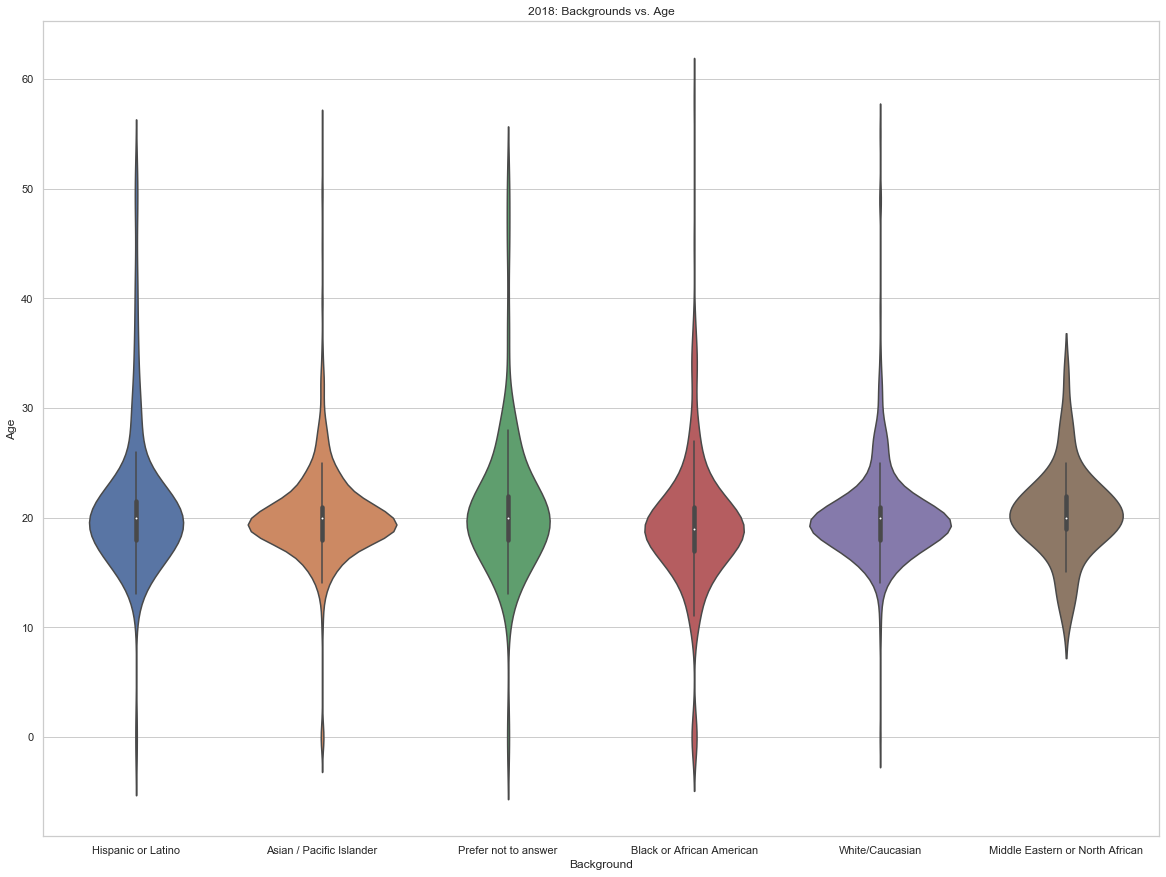

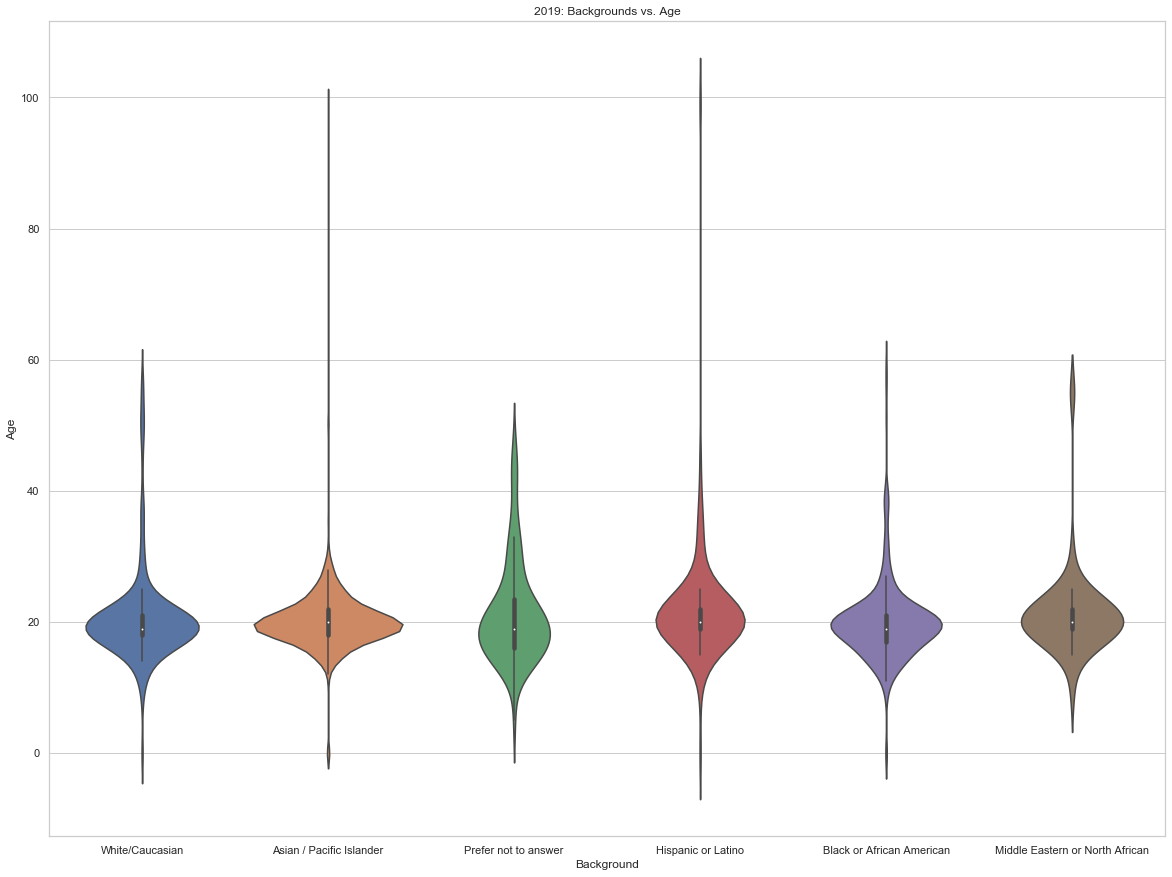

In [12]:
i = 0

for data in datasets: 
    # Get the most common backgrounds (Limit to 6 for comparison between years)
    common_backgrounds = pd.DataFrame(data['Backgrounds'].value_counts())
    common_backgrounds = common_backgrounds[0:6]
    keys = common_backgrounds['Backgrounds'].keys()

    # Limit the dataset to the most common backgrounds
    limited_backgrounds = data[data['Backgrounds'].isin(keys)]
    limited_backgrounds

    # Create a violin plot of the most common backgrounds and their respective ages
    plt.figure(figsize=(20,15))
    ax = sns.violinplot(x='Backgrounds', y='Age', data = limited_backgrounds)
    ax.set(title=str(data_years[i]) + ': Backgrounds vs. Age', xlabel='Background', ylabel='Age')
    plt.show()
    
    i += 1

#### Registrants Experiences as Hackers
Technica asked its participants: 
* Have you attended a hackathon before?
* Is Technica your first hackathon?

Using matplot library, we created pie charts to understand registrants previous experience. 

<b> First Hackathon </b> <br>
In both 2017 and 2018, between 50% and 60% of registrants had never been to a hackathon before, showing that the inclusion of non-college age people is important to Technica's success, and that Technica is a great opportunity for people who have never been to a hackathon before to get a good first experience. 2019 further shows this trend, with 72.7% of respondants saying Technica was their first hackathon ever. The fact that this data is increasing also shows that people new to tech and hackathon culture are learning about Technica and are interested
 
<b> First Technica </b> <br>
Unforuntately, there is no data from 2017 for this question, but both 2018 and 2019 results show that the majority of people who have attended Technica have never been to one before. This going hand in hand with Technica's goal to introduce the tech environment to underrepresented minorities, and by having a high first-time Technica registrant rate, it shows that many people are learning about the experience. <br> <br>
With roughly 20% - 25% of registrants returning, it indicates that they enjoyed it the first time. This says strides about the culture and bond that people have created with the event, as it shows a high retention rate for registrants. 

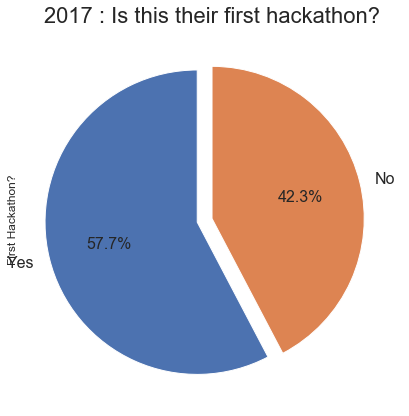

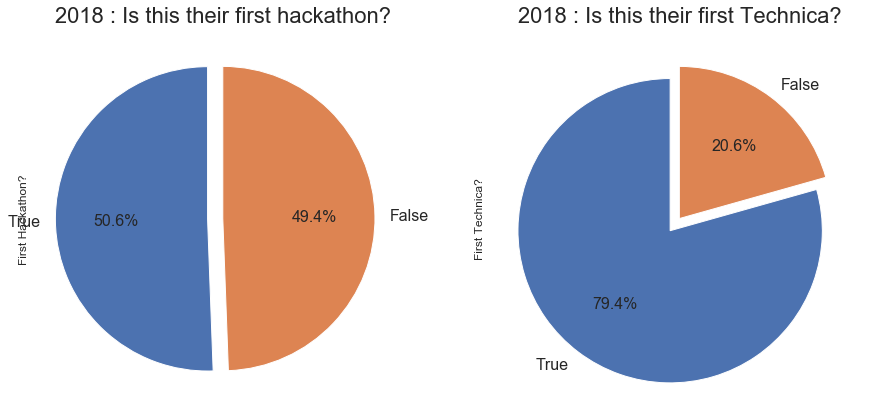

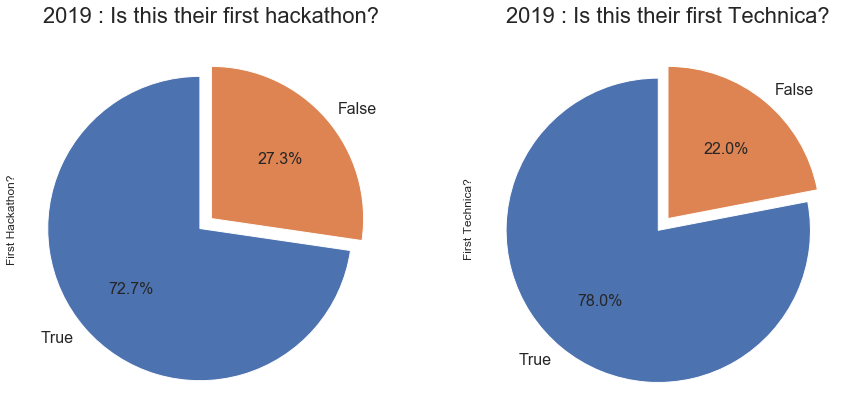

In [13]:
i = 0

# 2017 data does not have the "first Technica" question, so manually computing the first hackathon alone
occurrences3 = clean_2017_data['First Hackathon?'].value_counts()
occurrences3.plot.pie(y=occurrences3.index,
                      shadow=False, 
                      explode=(0.1, 0),
                      startangle=90,
                      autopct='%1.1f%%',
                      figsize=(10,7),
                      textprops={'fontsize': 16})

plt.title('2017 : Is this their first hackathon?', fontsize = 22)
plt.show()
          
for data in full_datasets:     
    # Removes invalid answers, surveys were self-fill, so there is some invalid data
    occurrences = data['First Hackathon?'].value_counts()
    occurrences2 = data['First Technica?'].value_counts()

    # Creates a Pie Chart of the Gender Identity data

    plt.axis('equal')
    ax1 = plt.subplot2grid((1,2),(0,0))
    occurrences.plot.pie(y=occurrences.index,
            shadow=False, 
            explode=(0.1, 0),
            startangle=90,
            autopct='%1.1f%%',
            figsize=(15,12),
            textprops={'fontsize': 16})

    plt.title(str(full_data_years[i]) + ' : Is this their first hackathon?', fontsize = 22)

    ax2 = plt.subplot2grid((1,2),(0,1))
    occurrences2.plot.pie(y=occurrences2.index,
            shadow=False, 
            explode=(0.1, 0),
            startangle=90,
            autopct='%1.1f%%',
            figsize=(15,12),
            textprops={'fontsize': 16})

    plt.title(str(full_data_years[i]) + ' : Is this their first Technica?', fontsize = 22)
    plt.show()
    
    i += 1

## Map of Hackers in the USA

### Visualizations of Registrants
In addition to understanding the background (age, ethnicity, education, and majors) of our registrants, we also wanted to know how far Technica’s reach geographically. As a result, we decided to use Folium to create a visualization of a map of where our registrants are from and how far they’re willing to travel to attend Technica! 

The list below shows all 32 states that Technica registrants came from in 2018 and the map shows the physical locations on a map, with five degrees of colors showing where higher concentrations of people are coming from:

* 1 - 10 Registrants : Green
* 11 - 50 Registrants : Blue
* 51 - 100 Registrants: Orange
* 101 - 500 Registrants : Light Red
* 500+ Registrants : Dark Red

The 2018 map indicates that the majority of our participants come from the East Coast, with other large concentrations coming from Georgia, Texas, Washington, Indiana, Illinois, and California. Through experience, we recognize these states as states with large computer science schools and presences with students who are passionate about getting involved in tech, and are more likely to come. There is a clear and present gap in the midwest United States, and this lack of registrants clearly shows that more outreach in these areas are needed. Out of 2224 registrants, only 2 were from these regions.


In [14]:
save_states = clean_data['State'].dropna().value_counts()
save_states

Maryland          963
New York          190
Virginia          189
Pennsylvania      100
New Jersey         77
Other              71
North Carolina     38
Massachusetts      31
California         28
Indiana            25
Florida            23
Texas              16
Washington         13
Georgia            12
Illinois           11
Michigan            7
Ohio                7
West Virginia       6
Rhode Island        5
Wisconsin           5
Tennessee           5
Delaware            5
Utah                4
South Carolina      3
Alabama             3
Louisiana           3
Kentucky            3
Connecticut         2
Iowa                2
Arizona             1
Minnesota           1
Alaska              1
Name: State, dtype: int64

In [15]:
page_info = requests.get("https://www.latlong.net/category/states-236-14.html")
soup_info = BeautifulSoup(page_info.text)

map_coordinates = soup_info.find(class_='col-8')
coordinates = map_coordinates.find_all('td')

our_state_list = save_states.keys()
our_state_values = save_states.values

fresh_state_list = []
lat_list = []
lon_list = []
val_list = []

count = 1
# for coord in coordinates:
for i in range(0,len(coordinates)-1,3):
    #parsing for state name
    info = str(coordinates[i].contents)
        
    find_state = re.findall(r'title="\w+,|title="\w+\s\w+,', info)

    find_state = find_state[0].replace("title=\"", "")
    find_state = find_state[:-1]
    
    if find_state in our_state_list:
        fresh_state_list.append(find_state)
        lon_list.append(coordinates[i+1].contents[0])
        lat_list.append(coordinates[i+2].contents[0])
        val_list.append(save_states[find_state])

map_data = pd.DataFrame({
    'name':fresh_state_list,
    'lat':lat_list,
    'lon':lon_list,
    'val':val_list
})

In [16]:
from folium.plugins import MarkerCluster

map_osm = folium.Map(location=[30, -90], zoom_start=4)

marker_cluster = MarkerCluster().add_to(map_osm)

def cluster_color(num):
    if num <= 10:
        return 'green'
    elif num > 10 and num <= 50:
        return 'lightblue'
    elif num > 50 and num <= 100:
        return 'orange'
    elif num > 100 and num <= 500:
        return 'lightred'
    else:
        return 'darkred'

# Add the datapoints to the map object
for i in range(0,len(map_data)):
    folium.Marker([map_data.iloc[i]['lon'], 
                   map_data.iloc[i]['lat']], 
                  popup=map_data.iloc[i]['name'],
                  icon=folium.Icon(color=cluster_color(map_data.iloc[i]['val']))
                 ).add_to(map_osm)
    
map_osm

Now looking at the 2019 data, we see that the demographics and areas of influence are almost exactly the same as 2018, and although there are more registrants, the average locations and numbers changes very little. This continues to highlight the fact that there is very little representation from the American midwest, and a very large showing from the local East Coast and more tech-oriented states.

In [17]:
save_states = clean_2019_data['State'].dropna().value_counts()
print(save_states.to_string())

Maryland          1226
Virginia           207
New York           184
Pennsylvania       133
Other               93
New Jersey          66
Florida             46
California          42
North Carolina      35
Massachusetts       28
Indiana             25
Georgia             19
Washington          18
Texas               17
Delaware            17
Illinois            16
Ohio                 9
Connecticut          9
South Carolina       8
Rhode Island         7
West Virginia        6
Missouri             4
Michigan             4
Alabama              2
Colorado             2
Wyoming              1
Mississippi          1
Wisconsin            1
Louisiana            1
New Hampshire        1
Hawaii               1
Tennessee            1


In [18]:
page_info = requests.get("https://www.latlong.net/category/states-236-14.html")
soup_info = BeautifulSoup(page_info.text)

map_coordinates = soup_info.find(class_='col-8')
coordinates = map_coordinates.find_all('td')

our_state_list = save_states.keys()
our_state_values = save_states.values

fresh_state_list = []
lat_list = []
lon_list = []
val_list = []

count = 1
# for coord in coordinates:
for i in range(0,len(coordinates)-1,3):
    #parsing for state name
    info = str(coordinates[i].contents)
        
    find_state = re.findall(r'title="\w+,|title="\w+\s\w+,', info)

    find_state = find_state[0].replace("title=\"", "")
    find_state = find_state[:-1]
    
    if find_state in our_state_list:
        fresh_state_list.append(find_state)
        lon_list.append(coordinates[i+1].contents[0])
        lat_list.append(coordinates[i+2].contents[0])
        val_list.append(save_states[find_state])

map_data = pd.DataFrame({
    'name':fresh_state_list,
    'lat':lat_list,
    'lon':lon_list,
    'val':val_list
})

In [19]:
map_osm_2 = folium.Map(location=[30, -90], zoom_start=4)

marker_cluster = MarkerCluster().add_to(map_osm_2)

# Add the datapoints to the map object
for i in range(0,len(map_data)):
    folium.Marker([map_data.iloc[i]['lon'], 
                   map_data.iloc[i]['lat']], 
                  popup=map_data.iloc[i]['name'],
                  icon=folium.Icon(color=cluster_color(map_data.iloc[i]['val']))
                 ).add_to(map_osm_2)
    
map_osm_2

#### Thoughts on Introducing Machine Learning
Throughout this project, we wanted to incorporate some kind of predictive model for our data. However, after some thought, we came to the conclusion that the data is not sufficient to create a training model with only two complete datasets. 

#### Our Potential ML Implementation
We wanted to create a model of whether Technica would have an overflow of people attending the event like it did in 2015 and 2019, but we do not have an accurate dataset for 2015 or enough informatmion to base our model on with only two data points. We also thought about predicting retention rate for Technica 2020 of people returning to Technica, but since 2017 did not provide that information, we decided that 2 years of retention data was not enough to make conclusions what is expected for Technica 2020. We hope that more analysis is possible in the future as Technica gets older and streamlines its data collection process.

## Conclusion

Although both of the authors have been active in Technica's operations, this traditionally private data shows a lot about the development of the hackathon and its future growth. There is a healthy amount of non-college student aged people attending, and we hope to see that grow as it becomes more mainstream and popular among women and non-binary individuals hoping to get acquanited with tech. The major distribution is still heavily computer science and other related fields, but the shift towards including other majors is present and we look forward to seeing a more diverse group of people attending. There is a very healty number of new people attending Technica in 2018 and 2019, and it shows that Technica is a great starting point for getting into tech. <br> <br>

With this, we see a lot of rooms for improvement still. There is an overwhelming majority of people of Asian/Pacific Islander descent, almost tripling the second largest category, with people of Caucasian descent always being second. Technica fosters a sense of inclusivity with its aim to serve the underrepresented, so having such a large divide in the backgrounds of its participants is concerning. The geographical reach of Technica leaves something to be desired as well, as there are large chunks of the continental United States missing, along with a lot of the rest of the world. Technica is the world's largest all-womens and non-binary people's hackathon, and it is important to have as diverse of a group as possible in order to reach as many people as possible. <br> <br>

We had a lot of fun developing this project and learning more about Technica, and we hope that you the reader will attend or contribute in the future! <br> <br>


<b> Additional Resources: </b> <br>
Technica 2018: https://medium.com/gotechnica/and-thats-a-wrap-1237570189b5 <br>
To learn more about Gender Inequality: https://medium.com/gotechnica/the-gender-gap-in-technology-2b30684ea1d7

![](technica_cover_2.jpg)